In order to successfully complete this assignment you must:
1. Do the required reading, watch the provided videos and complete all instructions in this notebook.
2. The assignment must be submitted to the exercises folder in the `cmse802-yourlastname` repository on or before **10:00 am the day of the class**.  Late assignment will receive <=80% of the grade.

Students must come to class the next day prepared to discuss the material covered in this assignment. 

### <p style="text-align: right;"> &#9989; Put your name here:Pavan yachamaneni </p>

# __Graph II: Tower Problem__

# Learning objectives

At the end of the exercise, you should be able to:
- Specify directory and file path with `Pathlib`.
- Explain why stub function is useful and use it in programming.
- Explain what the cellphone tower problem is and how it is related to graph.
- Establish a nearest neighbor graph.

# Outline

1. [Couple tipbits on programming](#programming)
1. [Cell ohone tower placement problem](#tower)
1. [Nearest Neighbor Graph](#Nearest_Neighbor_Graph)
1. [Assignment wrap-up](#Assignment_wrap-up)

----
<a name="programming"></a>
# 1. Couple tipbits on programming

## 1.1 Cross platform file path

In many cases, installation of files is distributed to different paths on Windows, Mac and Linux work with file paths. These issues are quite annoying.  Please read though the following blog post to learn more about the issue:

- [Python 3 Quick Tip: The easy way to deal with file paths on Windows, Mac and Linux](https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f)

&#9989; <font color=blue>**DO THIS:**</font> Let's practice using `pathlib` by doing the following:

- In the folder where your Jupyter notebook is, create a new folder called `tmp` in your `cmse802-yourlastname` repo. In the `tmp` folder, create a folder called `sub_tmp`.
- In the `sub_tmp` folder, create a file called `test_path.txt` and put a few lines of text in there..
- Write code below that use `pathlib` to specify the path to `test_path.txt` and assign it to an object call `test_path`. Print out the type of `test_path`.
- Also write code that will make use of `test_path` and print out the concent of `test_path.txt`.

In [ ]:
!pwd

In [1]:
# put your code here
from pathlib import Path

data_folder = Path("C:/Users/dell/Downloads/cmse802-yachamaneni/Exercises/tmp/sub_tmp")

file_to_open = data_folder / "test_path.txt"

In [2]:
f = open(file_to_open)

print(f.read())

In case you dont see me,
	Good Morning, Good Evening, Good Night


## 1.2 Stubbing out your code

A stub function in software development is like an outline used to stand in as a substitute before the details of the function can be completed.  Good stub functions are like a plan for what you want your code to do. It takes the expected inputs and returns outputs in the expected format.  

&#9989; <font color=blue>**DO THIS:**</font> For example, if you're planning to build an alarm for your freezer to let you know if the temperature gets too warm, you might write the following stubs.

In [3]:
def ThermometerRead(myThermometer):
    # This is where I will put the code to read from my thermometer.
    return 4

freezer = None
temperature = ThermometerRead(freezer)
if temperature > 10:
    # Reminder to myself that the temperature should be in celsius. 
    print ("Warning: The freezer might be broken")


&#9989; <font color=red>**QUESTION:**</font> Do you use stub functions when you program? If so, under what situations do you do it? If not, how do you think stub function may be helpful?

<font size=+3>&#9998;</font>
I have never used them but they are very helpful to plan and minimize the errors in the code. Also we can know what are the missing qauntities.

---
<a name="tower"></a>
# 2. Cell phone tower placement problem

## 2.1 Problem statement

The signals from different cellphone towers that are close together can interfere.  

<img src="http://2.bp.blogspot.com/-X7XJfnPb6xU/TjZfTmAd9CI/AAAAAAAAAF0/3eGarXigOQE/s1600/dido1.jpg" width="50%"><p style="text-align: right;"></p>

In order to avoid this overlap cell phone companies use different frequency ranges in the Electromagnetic spectrum.  Two towers that are close together but have differences in frequencies (shown as colors, red/green/black in the following figure) do not cause nearly as much interference. 

<img src="http://2.bp.blogspot.com/-M4olRy6O-v4/TjZghvwq3KI/AAAAAAAAAF4/GtOd6Db-su4/s1600/dido2.jpg" width = "50%"><p style="text-align: right;"></p>

However, cellphone towers are never distributed in such an even pattern.   Consider the following map which shows the location of cell towers around Michigan State.

<img src='https://lh6.googleusercontent.com/qSPlrmlnBqN7JZu_U_zaOydbFhekPtQhYk2s0fmMo__5YktgYXWuenVkKATZ0uaDNfrex51kUW8SseGjFMMcL8yYPcuMc3_o5H125HMzvI1wd91ZM8XV98tLx23-=w740' width = "50%">

From: [http://www.antennasearch.com/](http://www.antennasearch.com/)

Another problem is that cellphone companies have to pay for each frequency range they use.  So they would like minimize the number of frequencies that they need to purchase while also minimizing the interference between the cell towers. 

We are going to go though the steps to solve this problem using graph theory.  In this pre-class we will also practice writing stub functions as a way to organize our code.

As you can see, the code doesn't actually do what I want yet, but it will run, and I have the overall structure set up.  So, once I have my roadmap set up, I can go back and fill in the pieces. 

## 2.2 Generate random cell towers. 

Eventually, we will want to use real cell tower locations. For the moment, we are going to write a stub-function as a stand-in for that data that we can use while testing our code. 

&#9989; <font color=blue>**DO THIS:**</font> Create a function `generate_Towers` to create a 2D ```numpy``` array with __random__ entries. The array should have $N$ rows representing cell towers and 2 columns representing the $x$ (longitude) and $y$ (latitude) positions of the cell towers on a map. You may assume that the map is a 2D plane and not a sphere. For now you can also just use longitude and latitude numbers randomly generated between zero (0) and one (1).  (we can scale them later if need be). 

Check out [this page](https://numpy.org/doc/stable/reference/random/generator.html) on how to generate random numbers reproducibly (so others may repeat what you did). In there, you will find a way to get a random number generator object with the `default_rng` function. Initialize the function with $20220214$ and generate the 2D array with random entries.

In [4]:
#put your code here.

import numpy as np
def generate_Towers(n):
    rng = np.random.default_rng(20222014)
    vec = rng.random((n,2))
    return vec

&#9989; <font color=blue>**DO THIS:**</font> Generate $N=50$ towers using your above function and save this array as `points` to be used later. Plot the results as a scatter plot with:

- X axis label: `longitude`
- Y axis label: `latitude`
- Title: `'Randomly generated cell towers`

array([0.5388798 , 0.72565614])

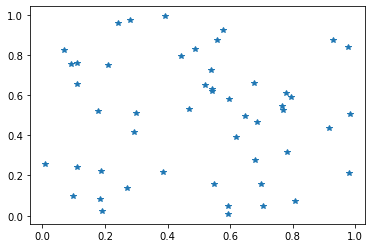

In [7]:
#put your code here.
vec = generate_Towers(50)

import matplotlib.pyplot as plt
lat = vec[:,0]
lon = vec[:,1]
plt.plot(lat,lon,"*")

vec[0,:]

## 2.3 Nearest Neighbor Graph

Which towers are too close to each other? Before getting at this, we want to find out what the nearest neighbor of each tower is and plot that relationships as a graph. To do so, we need three things:

1. Distance between towers
2. A function that use the distances to find the nearest neighbors and build a graph.

&#9989; <font color=blue>**DO THIS:**</font> We will do this with the Nearest Neighbor Graph algorithm. Visit the following site and get an idea what it is:

https://en.wikipedia.org/wiki/Nearest_neighbor_graph

### Part 1. Tower distances

&#9989; <font color=blue>**DO THIS:**</font> To help you out I have included a function that computes the distance matrix for you, where entry $D[i,j]$ is the distance between point $i$ and point $j$. Run the following code.

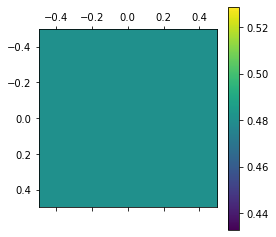

In [9]:
from scipy.spatial import distance_matrix
import networkx as nx
import matplotlib.pyplot as plt
# Assuming you made an array of example points above called points, 
# this code block will make a distance matrix for you 
D = distance_matrix([vec[0,:]],[vec[1,:]])
im = plt.matshow(D)
plt.colorbar(im)
plt.show()

### Part 2: Build nearest neighbor graph

&#9989; <font color=blue>**DO THIS:**</font> Basically the nearest neighbor graph algorithm loops though all of the points and finds the nearest neighbor to each point.  

In the code block below, complete the code in the for loop to generate an adjacency graph (a dictionary of lists, with a node `n` as key and a list of nodes connected to `n` as values) of the nearest neighbors.

In [10]:
# put your code in this block

def nn_graph(points):

    # Making sure I have the right number of points 
    N = points.shape[0]

    G = nx.Graph()
    G.add_nodes_from(list(range(N)))

    for i in range(N):
        ###########################################################
        ### Put your code below to add the edges to the graph. ####
        ### You'll need the add_edge function from networkx.   ####
        ###########################################################
       

    
    return(G)

G = nn_graph(points)

IndentationError: expected an indented block (<ipython-input-10-f361be5a872e>, line 19)

In [45]:
# put your code in this block

def nn_graph(points):

    # Making sure I have the right number of points 
    N = points.shape[0]

    G = nx.Graph()
    #G.add_nodes_from(list(range(N)))
    d = dict()

    for i in range(N):
        dij = []
        mindist = 0
        for j in range(N):
            if i==j:
                continue
            dij.append(distance_matrix([vec[i,:]],[vec[j,:]]))
        min_dist = min(dij)
        min_dist_node_i  = dij.index(min_dist)
        d[i] = min_dist_node_i
        
    G.add_nodes_from(d.keys())
    for k, v in d.items():
        G.add_edges_from(([(v, k)]))
    print(d)

    
    return(G)

G = nn_graph(vec)

{0: 45, 1: 20, 2: 10, 3: 27, 4: 14, 5: 40, 6: 13, 7: 44, 8: 23, 9: 22, 10: 36, 11: 20, 12: 3, 13: 33, 14: 6, 15: 21, 16: 29, 17: 17, 18: 17, 19: 6, 20: 19, 21: 11, 22: 15, 23: 32, 24: 8, 25: 47, 26: 35, 27: 10, 28: 3, 29: 21, 30: 37, 31: 40, 32: 44, 33: 23, 34: 13, 35: 44, 36: 26, 37: 10, 38: 30, 39: 39, 40: 39, 41: 5, 42: 6, 43: 48, 44: 32, 45: 7, 46: 7, 47: 33, 48: 25, 49: 43}


In [46]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

&#9989; <font color=blue>**DO THIS:**</font> Run the following to draw the resulting graph.

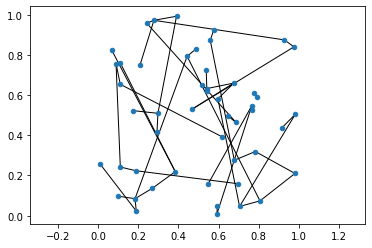

In [47]:
node_pos = {}

for v in G.nodes():
    node_pos[v] = vec[v,:]

fig, ax = plt.subplots()
nx.draw(G, node_pos, node_size=20)
limits = plt.axis('on')
plt.axis('equal');
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

Run your nearest neighbor graphing function on the points you generated in the above step.  See if you can generate a plot of the points and include the edges of the graph. Your plot should look something like the following:

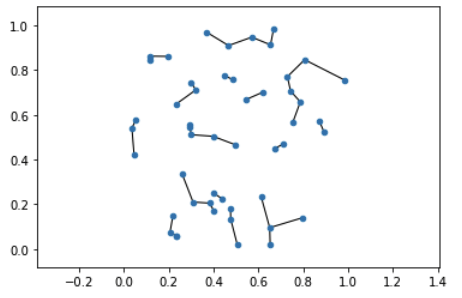

----
<a name="Assignment_wrap-up"></a>
# 4. Assignment wrap-up

Please fill out the [pre-class survey](https://docs.google.com/forms/d/e/1FAIpQLSfhEjAujkrA3E5h739qRzj9buceC2PhbCrSnc6ecHZoDydroQ/viewform) to receive credit for this assignment.

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit this notebook file before the assignment due date.